<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-просмотр-данных" data-toc-modified-id="Загрузка-и-просмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и просмотр данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-данных:" data-toc-modified-id="Импорт-библиотек-и-данных:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и данных:</a></span></li><li><span><a href="#Создание-функций-для-просмотра-информации-о-данных:" data-toc-modified-id="Создание-функций-для-просмотра-информации-о-данных:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Создание функций для просмотра информации о данных:</a></span></li><li><span><a href="#Просмотр-информации-о-данных:" data-toc-modified-id="Просмотр-информации-о-данных:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Просмотр информации о данных:</a></span></li></ul></li><li><span><a href="#Обработка-и-подготовка-к-анализу-данных" data-toc-modified-id="Обработка-и-подготовка-к-анализу-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обработка и подготовка к анализу данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Как-нарастает-рекламный-заработок-в-первый-месяц-жизни-у-пользователей-игры?" data-toc-modified-id="Как-нарастает-рекламный-заработок-в-первый-месяц-жизни-у-пользователей-игры?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Как нарастает рекламный заработок в первый месяц жизни у пользователей игры?</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Во-сколько-раз-увеличится-ревеню-нулевого-дня-(день-установки-игры),-первого-и-третьего-дня-к-X-дню?" data-toc-modified-id="Во-сколько-раз-увеличится-ревеню-нулевого-дня-(день-установки-игры),-первого-и-третьего-дня-к-X-дню?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и третьего дня к X дню?</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li></ul></div>

## Загрузка и просмотр данных

### Импорт библиотек и данных:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = 'C:\\Users\\Софья\\Downloads\\Ad_revenue.xlsx'

In [3]:
try:
    df_ad_revenue = pd.read_excel(filepath, sheet_name='ad revenue')
    print("Файл успешно загружен")
except Exception as e:
    print(f"Не удалось прочитать файл: {e}")

Файл успешно загружен


In [4]:
try:
    df_installs_data = pd.read_excel(filepath, sheet_name='installs data')
    print("Файл успешно загружен")
except Exception as e:
    print(f"Не удалось прочитать файл: {e}")

Файл успешно загружен


### Создание функций для просмотра информации о данных:

In [5]:
def table_info(table):
    # Вывод информации о таблице
    print('\033[1m' + 'Информация о таблице:' + '\033[0m')
    print(table.info())
    
    # Проверка наличия дубликатов
    print('\033[1m' + 'Количество явных дубликатов в таблице:' + '\033[0m')
    print(table.duplicated().sum())

In [6]:
def pass_value_barh(df):
    # Вычисляем процент пропусков для каждого столбца
    missing_data = (df.isna().mean() * 100).to_frame(name='space').query('space > 0').sort_values(by='space')
    
    # Проверяем, есть ли пропущенные значения
    if not missing_data.empty:
        ax = missing_data.plot(kind='barh', figsize=(10, 3), rot=0, legend=False, fontsize=14, color='skyblue')
        ax.set_title('Пропущенные значения, %', fontsize=22, color='SteelBlue')
        ax.set_xlabel('Процент пропусков', fontsize=18)
        ax.set_ylabel('Столбцы с пропусками', fontsize=18)
        ax.set_xlim(0, 100)
        plt.show()
    else:
        print('Пропусков не осталось, или данных для анализа нет.')

### Просмотр информации о данных:

In [7]:
table_info(df_ad_revenue)
df_ad_revenue.head()

Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78723 entries, 0 to 78722
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   install_date   78723 non-null  datetime64[ns]
 1   event_date     78723 non-null  datetime64[ns]
 2   event_revenue  77812 non-null  float64       
 3   platform       78723 non-null  object        
 4   user_id        78723 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 3.0+ MB
None
Количество явных дубликатов в таблице:
1209


,install_date,event_date,event_revenue,platform,user_id
0,2023-09-21,2023-09-21,0.316470,android,1695339148585-8391306266630234966
1,2023-09-21,2023-09-21,0.063103,android,1695280270975-5411644856462553821
2,2023-09-21,2023-09-21,0.316470,android,1695317488398-8939481192662600393
3,2023-09-21,2023-09-21,0.054710,android,1695317488398-8939481192662600393
4,2023-09-21,2023-09-21,0.024880,android,1695280270975-5411644856462553821


In [8]:
table_info(df_installs_data)
df_installs_data.head()

Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   install_date  579 non-null    datetime64[ns]
 1   installs      579 non-null    int64         
 2   platform      579 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.7+ KB
None
Количество явных дубликатов в таблице:
361


,install_date,installs,platform
0,2023-09-21,1,android
1,2023-09-21,0,android
2,2023-09-21,47,android
3,2023-09-21,0,android
4,2023-09-21,0,android


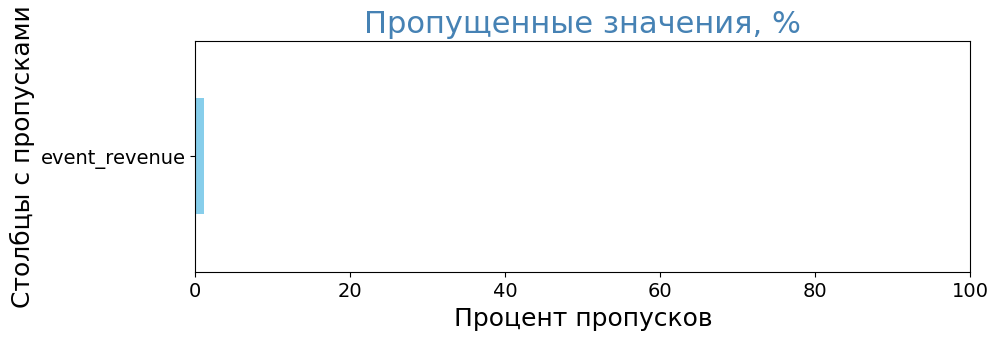

Пропусков не осталось, или данных для анализа нет.


In [9]:
pass_value_barh(df_ad_revenue)
pass_value_barh(df_installs_data)

## Обработка и подготовка к анализу данных

In [10]:
# Удаление явных дубликатов
df_ad_revenue = df_ad_revenue.drop_duplicates()

In [11]:
# Удаление явных дубликатов
df_installs_data = df_installs_data.drop_duplicates()

In [12]:
# Так как пропусков менее 5%, эти строки можно удалить
df_ad_revenue = df_ad_revenue.dropna(subset=['event_revenue'])

## Исследовательский анализ данных

### Как нарастает рекламный заработок в первый месяц жизни у пользователей игры?

In [13]:
# Добавляем столбец с разницей дней между install_date и event_date (число дней с момента установки)
df_ad_revenue['days_since_install'] = (df_ad_revenue['event_date'] - df_ad_revenue['install_date']).dt.days

In [14]:
# Группируем данные по дням с момента установки и считаем суммарный доход по каждому дню
revenue_by_day = df_ad_revenue.groupby('days_since_install')['event_revenue'].sum()
revenue_by_day

days_since_install
0    4312.388802
1    1749.999875
2    1010.953321
3     670.220262
4     415.997665
5     217.091179
6     124.202999
7      69.973291
8      43.404887
9      13.517914
Name: event_revenue, dtype: float64

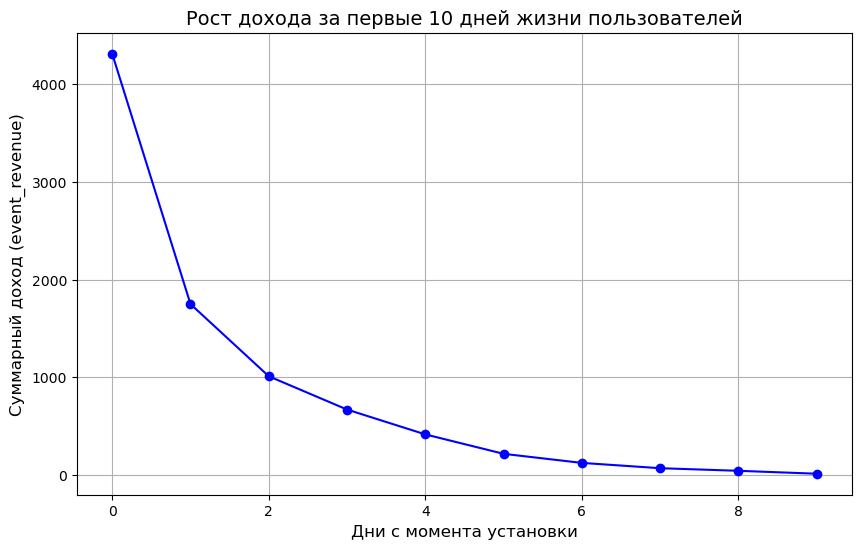

In [15]:
# Данные для первых 10 дней
days = revenue_by_day.index
revenues = revenue_by_day.values

# Строим график зависимости дохода от количества дней после установки
plt.figure(figsize=(10, 6))
plt.plot(days, revenues, marker='o', linestyle='-', color='b')

# Настройки графика
plt.title('Рост дохода за первые 10 дней жизни пользователей', fontsize=14)
plt.xlabel('Дни с момента установки', fontsize=12)
plt.ylabel('Суммарный доход (event_revenue)', fontsize=12)
plt.grid(True)

# Показываем график
plt.show()

In [16]:
# Группируем данные по дате установки и количеству дней с момента установки, суммируя доходы (event_revenue)
grouped_revenue = df_ad_revenue.groupby(['install_date', 'days_since_install'])['event_revenue'].sum().unstack()
grouped_revenue

days_since_install,0,1,2,3,4,5,6,7,8,9
install_date,,,,,,,,,,
2023-09-21,250.690207,90.050838,55.957738,40.644282,33.224541,24.452859,21.983467,15.526360,15.473379,13.517914
2023-09-22,298.912279,102.907600,51.317583,38.088258,40.661297,30.507611,22.090939,20.164325,27.931508,NaN
2023-09-23,305.251365,144.563393,71.718568,57.431749,46.594525,40.390391,38.205923,34.282606,NaN,NaN
2023-09-24,479.590360,176.026499,115.864641,80.173004,68.749947,43.248005,41.922670,NaN,NaN,NaN
2023-09-25,689.403892,280.798198,158.380607,146.781009,92.538496,78.492313,NaN,NaN,NaN,NaN
2023-09-26,754.378128,333.214173,180.165210,164.773894,134.228859,NaN,NaN,NaN,NaN,NaN
2023-09-27,807.189422,330.604241,205.136479,142.328066,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-28,726.973149,291.834933,172.412495,NaN,NaN,NaN,NaN,NaN,NaN,NaN


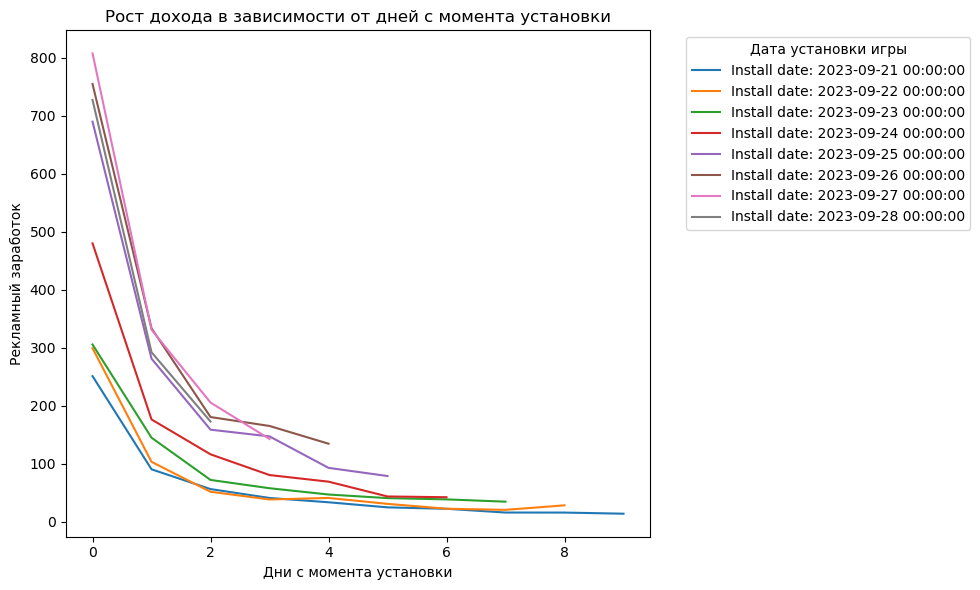

In [17]:
# Создаем график
plt.figure(figsize=(10, 6))

# Проходим по каждой дате установки и строим график дохода по дням
for install_date in grouped_revenue.index:
    plt.plot(grouped_revenue.columns, grouped_revenue.loc[install_date], label=f'Install date: {install_date}')

# Добавляем заголовок и метки осей
plt.title('Рост дохода в зависимости от дней с момента установки')
plt.xlabel('Дни с момента установки')
plt.ylabel('Рекламный заработок')
plt.legend(title='Дата установки игры', bbox_to_anchor=(1.05, 1), loc='upper left')

# Улучшаем компоновку графика
plt.tight_layout()

# Отображаем график
plt.show()

#### Вывод:

Из полученных данных можно сделать несколько выводов:

1. **Наибольший доход в день установки**: Максимальный доход ($4312.39) приходится на первый день (0 дней с момента установки). Это указывает на то, что пользователи наиболее активны сразу после установки игры, что генерирует максимальный рекламный заработок.

2. **Резкое снижение дохода**: Начиная со второго дня (1 день с момента установки), доход падает почти в 2.5 раза ($1750.00), что может свидетельствовать о снижении активности пользователей после первого дня игры.

3. **Продолжающееся снижение дохода**: Каждый последующий день доход снижается — на 3-4 день он составляет уже $670.22 и $416.00 соответственно. Это типичная картина для мобильных игр, когда интерес пользователей постепенно угасает, и они реже взаимодействуют с рекламой или игрой в целом.

4. **Долгосрочный доход минимален**: После первой недели (7-8 дней с момента установки) доход резко падает до $69.97 и $43.40. К 9-му дню доход становится минимальным — всего $13.52. Это подтверждает тенденцию к снижению вовлеченности со временем.

**Заключение:**
- Основной рекламный доход поступает в первые 1-2 дня после установки.
- Чтобы увеличить долгосрочный доход, возможно, стоит проанализировать удержание пользователей и улучшить механики возврата их к игре после первых дней активности.

### Во сколько раз увеличится ревеню нулевого дня (день установки игры), первого и третьего дня к X дню?

In [18]:
# Рассчитываем рост доходов относительно нулевого дня
growth_from_0 = grouped_revenue.div(grouped_revenue[0], axis=0)

# Рассчитываем рост доходов относительно первого дня
growth_from_1 = grouped_revenue.div(grouped_revenue[1], axis=0)

# Рассчитываем рост доходов относительно третьего дня
growth_from_3 = grouped_revenue.div(grouped_revenue[3], axis=0)

# Создаем новый датафрейм, который содержит коэффициенты роста относительно нулевого, первого и третьего дня
growth_comparison_df = pd.DataFrame({
    'Рост с нулевого дня': growth_from_0.mean(),  # Средний рост доходов с нулевого дня
    'Рост с первого дня': growth_from_1.mean(),   # Средний рост доходов с первого дня
    'Рост с третьего дня': growth_from_3.mean()    # Средний рост доходов с третьего дня
}).fillna(0)  # Заполняем отсутствующие значения нулями
growth_comparison_df

,Рост с нулевого дня,Рост с первого дня,Рост с третьего дня
days_since_install,,,
0,1.000000,2.522040,5.751311
1,0.400517,1.000000,2.269749
2,0.228912,0.573801,1.290253
3,0.178932,0.445992,1.000000
4,0.146120,0.368224,0.833150
5,0.107191,0.274524,0.636014
6,0.093543,0.240309,0.577253
7,0.080568,0.201836,0.502781
8,0.077583,0.221626,0.557019


#### Вывод:

1. **Рост доходов относительно нулевого дня**:
   - Нулевой день (0 дней с момента установки) выступает как базовый. Все значения на нулевой день равны 1, так как это исходная точка для расчета. 
   - В последующие дни наблюдается значительное снижение доходов. Например, на 1-й день доход составляет лишь 40% от дохода нулевого дня, а на 9-й день — всего 0.67%. Это подтверждает тенденцию резкого снижения доходов с течением времени после установки.

2. **Рост доходов относительно первого дня**:
   - В первый день доходы составляют 100%, и уже на второй день они падают примерно до 57.38% от уровня первого дня.
   - К 9-му дню доходы уменьшаются до 1.88% от доходов, полученных на первый день, что указывает на быстрое снижение активности пользователей после первого дня.

3. **Рост доходов относительно третьего дня**:
   - В третий день доходы принимаются за базовую точку (1), и к 4-му дню они уменьшаются до 71.41%.
   - После третьего дня снижение продолжается: к 9-му дню доходы составляют лишь 4.75% от уровня третьего дня. 
   - Значения "inf" (бесконечность) для нулевого и первого дня объясняются тем, что доход на нулевой и первый дни намного выше, чем на третий, и при делении на малые значения возникает бесконечность.

**Общие выводы:**
- Доходы значительно снижаются с каждым днем после установки игры, и это наиболее очевидно при сравнении с доходами первого и третьего дня.
- Самое резкое снижение доходов происходит в первые два дня, после чего темпы замедляются, но доходы продолжают снижаться. 
- Для долгосрочного удержания пользователей и увеличения доходов может потребоваться усиление механик вовлечения пользователей, особенно в первые дни после установки.